# **Meta Stock Price Prediction Using Deep Learning**

This project aims to predict **Meta's stock price** for the next year using a **Long Short-Term Memory (LSTM) neural network**, a type of recurrent neural network (RNN) well-suited for time-series forecasting. The model is trained on four years of historical stock price data, focusing specifically on the last 50 days of closing price data to make accurate predictions for the future.

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
!pip install yfinance
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading Facebook data

meta = yf.Ticker("META")

# get all stock info
meta.info

# get historical market data
hist = meta.history(period="5y")
print(hist)


                                 Open        High         Low       Close  \
Date                                                                        
2019-09-04 00:00:00-04:00  184.271326  187.364975  183.512890  186.756226   
2019-09-05 00:00:00-04:00  188.143379  190.967578  187.554593  190.508514   
2019-09-06 00:00:00-04:00  189.819938  189.819938  185.967853  187.105515   
2019-09-09 00:00:00-04:00  187.345023  188.592460  185.468889  188.372910   
2019-09-10 00:00:00-04:00  187.055608  187.714258  184.171535  185.788208   
...                               ...         ...         ...         ...   
2024-08-28 00:00:00-04:00  517.669983  521.090027  512.450012  516.780029   
2024-08-29 00:00:00-04:00  519.049988  527.200012  515.679993  518.219971   
2024-08-30 00:00:00-04:00  521.349976  523.539978  515.200012  521.309998   
2024-09-03 00:00:00-04:00  519.640015  525.489990  508.619995  511.760010   
2024-09-04 00:00:00-04:00  506.070007  516.590027  504.070007  515.169983   

## Data preprocessing

In [ ]:
# Kepping close prices only
data = hist.reset_index()['Close']
print(data)

0       186.756226
1       190.508514
2       187.105515
3       188.372910
4       185.788208
           ...    
1254    516.780029
1255    518.219971
1256    521.309998
1257    511.760010
1258    515.169983
Name: Close, Length: 1259, dtype: float64


In [ ]:
#Scaling the close price data
scalar = MinMaxScaler(feature_range=(0,1))
reshaped_data = data.values.reshape(-1, 1)
scaled_data = scalar.fit_transform(reshaped_data)
print(data)


0       186.756226
1       190.508514
2       187.105515
3       188.372910
4       185.788208
           ...    
1254    516.780029
1255    518.219971
1256    521.309998
1257    511.760010
1258    515.169983
Name: Close, Length: 1259, dtype: float64


In [ ]:
# Split into 4 years and past 1 year plus 50 days
data_4y = scaled_data[:-252]  # Assuming approximately 252 trading days in a year
data_rest = scaled_data[-302:]

print("Data for the past 4 years:")
print(len(data_4y))
print(data_4y)

print("\nData for the past 1 year plus 50 days:")
print(len(data_rest))
print(data_rest)

Data for the past 4 years:
1007
[[0.21727039]
 [0.22558696]
 [0.21804456]
 ...
 [0.45606215]
 [0.45780954]
 [0.45889333]]

Data for the past 1 year plus 50 days:
302
[[0.44197265]
 [0.41927905]
 [0.43825669]
 [0.43436386]
 [0.42604722]
 [0.43810187]
 [0.43597847]
 [0.45444747]
 [0.44918325]
 [0.44595396]
 [0.45385029]
 [0.46311793]
 [0.48755892]
 [0.49656115]
 [0.48651938]
 [0.49039009]
 [0.49355304]
 [0.50231203]
 [0.47247405]
 [0.45420418]
 [0.4483427 ]
 [0.45466865]
 [0.4637373 ]
 [0.49280102]
 [0.52325825]
 [0.50804073]
 [0.51713136]
 [0.49855184]
 [0.49607462]
 [0.49063339]
 [0.50352852]
 [0.49485806]
 [0.47842399]
 [0.47959624]
 [0.47052773]
 [0.48059162]
 [0.47121332]
 [0.45427053]
 [0.4339215 ]
 [0.42985172]
 [0.44456053]
 [0.43947325]
 [0.45415994]
 [0.43759315]
 [0.43482834]
 [0.44535677]
 [0.46245439]
 [0.45606215]
 [0.45780954]
 [0.45889333]
 [0.46723201]
 [0.46506445]
 [0.46395848]
 [0.46223321]
 [0.48362179]
 [0.4705719 ]
 [0.47809215]
 [0.49282314]
 [0.4675859 ]
 [0.4725

In [ ]:
# Training and Testing data
prediction_days = 50

X_train = []
Y_train = []
for x in range(prediction_days, len(data_4y)):
  X_train.append(data_4y[x-prediction_days:x, 0])
  Y_train.append(data_4y[x, 0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.21727039]
  [0.22558696]
  [0.21804456]
  ...
  [0.22545425]
  [0.22273371]
  [0.23348329]]

 [[0.22558696]
  [0.21804456]
  [0.22085361]
  ...
  [0.22273371]
  [0.23348329]
  [0.23065212]]

 [[0.21804456]
  [0.22085361]
  [0.21512488]
  ...
  [0.23348329]
  [0.23065212]
  [0.23056365]]

 ...

 [[0.43224046]
  [0.42629066]
  [0.43345702]
  ...
  [0.43482834]
  [0.44535677]
  [0.46245439]]

 [[0.42629066]
  [0.43345702]
  [0.44197265]
  ...
  [0.44535677]
  [0.46245439]
  [0.45606215]]

 [[0.43345702]
  [0.44197265]
  [0.41927905]
  ...
  [0.46245439]
  [0.45606215]
  [0.45780954]]]


## Build model: LSTM

In [ ]:
# model
model =Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0356
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0042
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0033
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0026
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0028
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0025
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0021
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0023
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0024
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0021
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0019
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0021
Epoch 13/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0017
Epoch 14/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0018
Epoch 15/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0016
E

In [ ]:
score1 = mean_squared_error(Y_train, model.predict(X_train))
score2 = r2_score(Y_train, model.predict(X_train))

print("The mean squared error of Training data:", score1)
print("The r2 error of Training data:", score2)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
The mean squared error of Training data: 0.000778232342545184
The r2 error of Training data: 0.9672884024086691


## Test data prediction

In [ ]:
# New Test data
X_test = []

for x in range(prediction_days, len(data_rest)):
  X_test.append(data_rest[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Predicting test data

predicted_price = model.predict(X_test)
predicted_price = scalar.inverse_transform(predicted_price)
print(predicted_price)



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[291.20108]
 [292.87448]
 [294.76898]
 [296.69574]
 [298.47754]
 [300.3469 ]
 [302.11252]
 [303.77957]
 [305.54385]
 [307.0021 ]
 [308.07202]
 [308.8266 ]
 [309.12646]
 [308.83975]
 [308.13324]
 [307.22598]
 [306.20807]
 [305.12848]
 [304.27368]
 [303.61896]
 [303.38177]
 [303.37994]
 [303.66684]
 [304.17395]
 [305.19943]
 [306.84998]
 [309.14154]
 [312.11392]
 [315.4344 ]
 [318.44907]
 [321.06204]
 [323.2986 ]
 [324.89664]
 [325.65173]
 [325.43945]
 [324.56647]
 [323.2406 ]
 [321.2058 ]
 [318.1519 ]
 [314.51767]
 [310.90286]
 [307.63297]
 [305.28253]
 [303.9886 ]
 [303.8213 ]
 [304.67447]
 [306.41577]
 [308.81702]
 [311.61853]
 [314.8456 ]
 [318.33914]
 [322.13165]
 [325.9206 ]
 [329.50647]
 [332.7398 ]
 [335.68127]
 [338.18427]
 [340.34073]
 [342.0412 ]
 [343.12537]
 [343.7455 ]
 [343.75842]
 [343.02246]
 [341.5405 ]
 [339.30902]
 [336.4657 ]
 [333.23492]
 [330.21634]
 [327.94794]
 [326.34344]
 [325.64868]
 [325.8505 ]
 [326.73514]
 [328.13428]


In [ ]:
data_pr = data[-252:]
print(data_pr)
data_pr.index = range(252)
print(data_pr)

1007    299.534485
1008    298.556519
1009    298.057526
1010    297.279114
1011    306.929260
           ...    
1254    516.780029
1255    518.219971
1256    521.309998
1257    511.760010
1258    515.169983
Name: Close, Length: 252, dtype: float64
0      299.534485
1      298.556519
2      298.057526
3      297.279114
4      306.929260
          ...    
247    516.780029
248    518.219971
249    521.309998
250    511.760010
251    515.169983
Name: Close, Length: 252, dtype: float64


In [ ]:
score1 = mean_squared_error(data_pr, predicted_price)
score2 = r2_score(data_pr, predicted_price)

print("The mean squared error of Testing data:", score1)
print("The r2 error of Testing data:", score2)

The mean squared error of Testing data: 357.7127331878051
The r2 error of Testing data: 0.948244514985685


## Test data prediction comparison

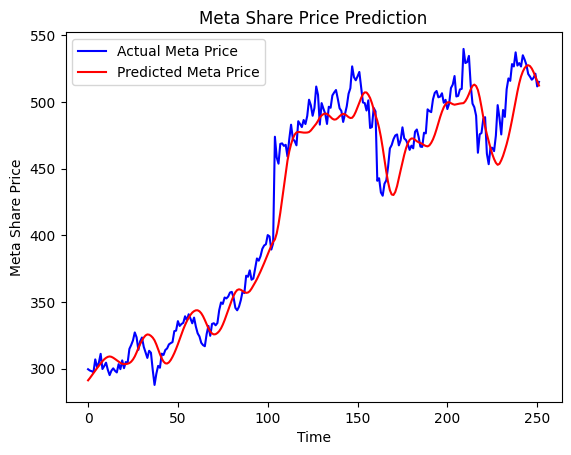

In [ ]:
# Plot the test predictions

plt.plot(data_pr, color='blue', label='Actual Meta Price')
plt.plot(predicted_price, color='red', label='Predicted Meta Price')
plt.title(f'Meta Share Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'Meta Share Price')
plt.legend()
plt.show()

## Build Model: Linear regression

In [ ]:
# Model building
model = LinearRegression()
X_train_2d = X_train.reshape(X_train.shape[0], -1)
model.fit(X_train_2d, Y_train)

score1 = mean_squared_error(Y_train, model.predict(X_train_2d))
score2 = r2_score(Y_train, model.predict(X_train_2d))

print("The mean squared error of Training data:", score1)
print("The r2 error of Training data:", score2)


The mean squared error of Training data: 0.00019998629914554328
The r2 error of Training data: 0.9915939354049029


## Test data prediction

In [ ]:
# New Test data
X_test = []

for x in range(prediction_days, len(data_rest)):
  X_test.append(data_rest[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Predicting test data
X_test_2d = X_test.reshape(X_test.shape[0], -1)
predicted_price = model.predict(X_test_2d)
predicted_price = predicted_price.reshape(-1, 1)
predicted_price = scalar.inverse_transform(predicted_price)
print(predicted_price)

[[294.05473189]
 [298.40448653]
 [296.64768492]
 [295.76723282]
 [296.34977282]
 [308.45656253]
 [300.39462648]
 [303.92912538]
 [309.09947953]
 [301.92839672]
 [302.54242228]
 [305.12736769]
 [300.36261354]
 [293.60554327]
 [297.66205117]
 [299.00590103]
 [302.97571653]
 [296.73944235]
 [304.53105728]
 [299.17854172]
 [303.78378812]
 [301.89006016]
 [303.52247321]
 [305.22571581]
 [312.9479456 ]
 [316.47447824]
 [318.4958984 ]
 [327.20197275]
 [323.78916535]
 [311.52872659]
 [319.25403541]
 [323.5293352 ]
 [315.18159508]
 [312.08084071]
 [308.43173188]
 [316.18659346]
 [311.30428418]
 [299.66345338]
 [288.55108326]
 [297.34518217]
 [303.09172162]
 [301.70644083]
 [310.45613562]
 [310.96678262]
 [313.08833917]
 [313.79761143]
 [316.3365265 ]
 [316.65739092]
 [318.70694343]
 [325.91449688]
 [329.72174602]
 [332.66788238]
 [332.50371865]
 [330.91323238]
 [333.08226067]
 [339.0347232 ]
 [335.98365024]
 [340.74605686]
 [337.19280567]
 [335.5603717 ]
 [338.43264929]
 [334.66739689]
 [327.56

In [ ]:
data_pr = data[-252:]
print(data_pr)
data_pr.index = range(252)
print(data_pr)

1007    299.534485
1008    298.556519
1009    298.057526
1010    297.279114
1011    306.929260
           ...    
1254    516.780029
1255    518.219971
1256    521.309998
1257    511.760010
1258    515.169983
Name: Close, Length: 252, dtype: float64
0      299.534485
1      298.556519
2      298.057526
3      297.279114
4      306.929260
          ...    
247    516.780029
248    518.219971
249    521.309998
250    511.760010
251    515.169983
Name: Close, Length: 252, dtype: float64


In [ ]:
score1 = mean_squared_error(data_pr, predicted_price)
score2 = r2_score(data_pr, predicted_price)

print("The mean squared error of Testing data:", score1)
print("The r2 error of Testing data:", score2)

The mean squared error of Testing data: 110.67511091739736
The r2 error of Testing data: 0.9839870278211883


Test data prediction comparison

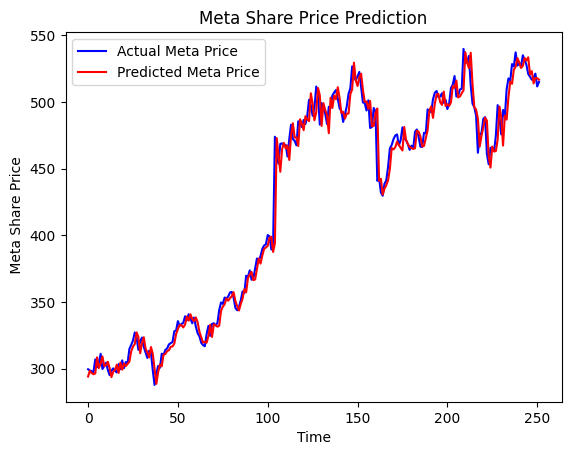

In [ ]:
# Plot the test predictions

plt.plot(data_pr, color='blue', label='Actual Meta Price')
plt.plot(predicted_price, color='red', label='Predicted Meta Price')
plt.title(f'Meta Share Price Prediction')
plt.xlabel('Time')
plt.ylabel(f' Meta Share Price')
plt.legend()
plt.show()